In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
nivel_mistura = 0.5
n_pontos_por_classe = 50
n_total = n_pontos_por_classe * 2

x = np.random.uniform(0, 1, n_total)
y = np.random.uniform(0, 1, n_total)

dist_11 = np.sqrt((x - 1)**2 + (y - 1)**2)
dist_00 = np.sqrt((x - 0)**2 + (y - 0)**2)

prob_classe_1 = (dist_00 - dist_11 + np.random.normal(0, nivel_mistura, n_total)) / 2

indices_ordenados = np.argsort(prob_classe_1)

labels = np.ones(n_total) * -1
labels[indices_ordenados[-n_pontos_por_classe:]] = 1

X = np.column_stack((x, y))
Y = labels

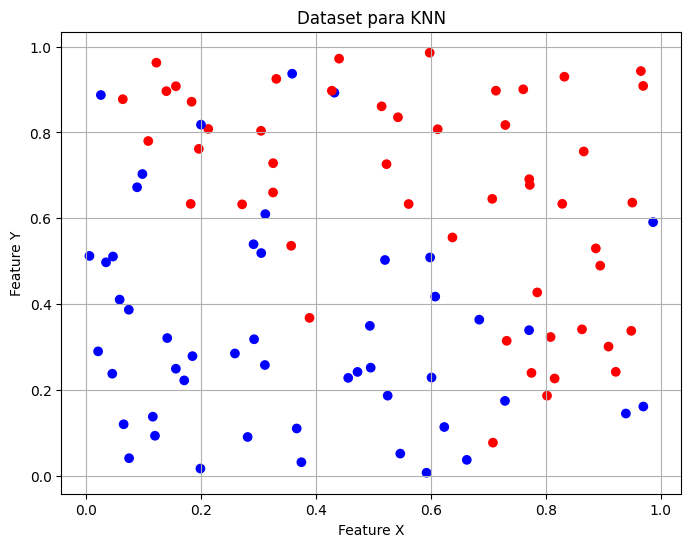

In [2]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', marker='o')
plt.title('Dataset para KNN')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()

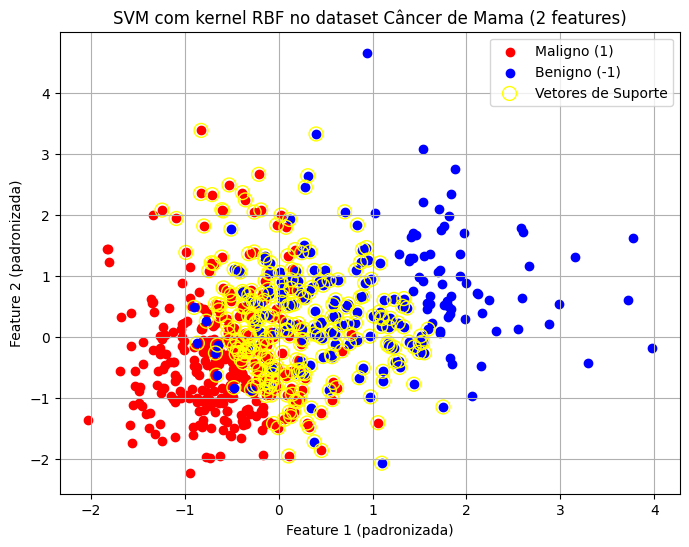

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Carregar o dataset câncer de mama
data = load_breast_cancer()
X = data.data[:, :2]  # Usando apenas as duas primeiras features para visualização
Y = data.target
# Ajustar os rótulos para -1 e 1
Y = np.where(Y == 0, -1, 1)

# Padronizar os dados para melhor desempenho do SVM
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Plot dos pontos do dataset câncer de mama
plt.figure(figsize=(8, 6))
plt.scatter(X_std[Y == 1, 0], X_std[Y == 1, 1], color='red', label='Maligno (1)')
plt.scatter(X_std[Y == -1, 0], X_std[Y == -1, 1], color='blue', label='Benigno (-1)')

# Treinar o SVM com kernel RBF
svm = SVC(kernel='rbf', C=0.695, gamma=0.0069)
svm.fit(X_std, Y)


# Vetores de suporte
support_vectors = svm.support_vectors_

# Plot dos vetores de suporte
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
            color='black', edgecolor='yellow', 
            label='Vetores de Suporte', s=100, marker='o', facecolors='none')

plt.title('SVM com kernel RBF no dataset Câncer de Mama (2 features)')
plt.xlabel('Feature 1 (padronizada)')
plt.ylabel('Feature 2 (padronizada)')
plt.grid(True)
plt.legend()
plt.show()


Melhores parâmetros: {'C': np.float64(0.2807216203941177), 'gamma': np.float64(0.01623776739188721), 'kernel': 'rbf'}
Melhor acurácia: 0.9051389535786368


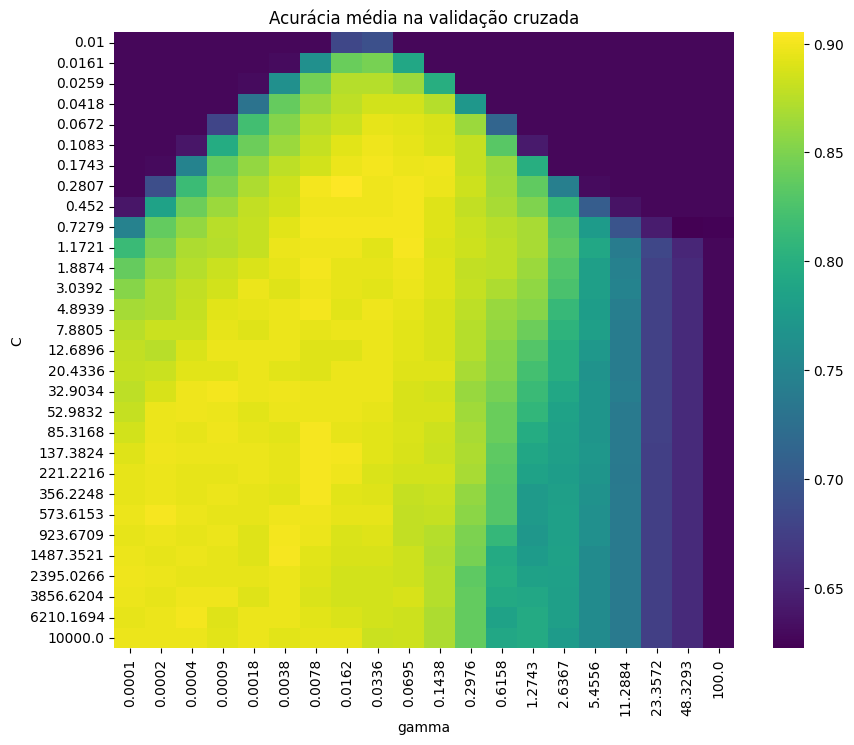

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aumentando a resolução do grid
param_grid = {
    'C': np.logspace(-2, 4, 30),      # 20 valores entre 0.01 e 1000
    'gamma': np.logspace(-4, 2, 20),  # 20 valores entre 0.0001 e 10
    'kernel': ['rbf']
}

svc = SVC()
grid = GridSearchCV(svc, param_grid, refit=True, verbose=0, cv=5, n_jobs=-1)
grid.fit(X, Y)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor acurácia:", grid.best_score_)

# Preparando dados para o heatmap
scores = grid.cv_results_['mean_test_score']
scores = scores.reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.figure(figsize=(10, 8))
sns.heatmap(scores, 
            xticklabels=np.round(param_grid['gamma'], 4), 
            yticklabels=np.round(param_grid['C'], 4), 
            cmap='viridis')
plt.xlabel('gamma')
plt.ylabel('C')
plt.title('Acurácia média na validação cruzada')
plt.show()

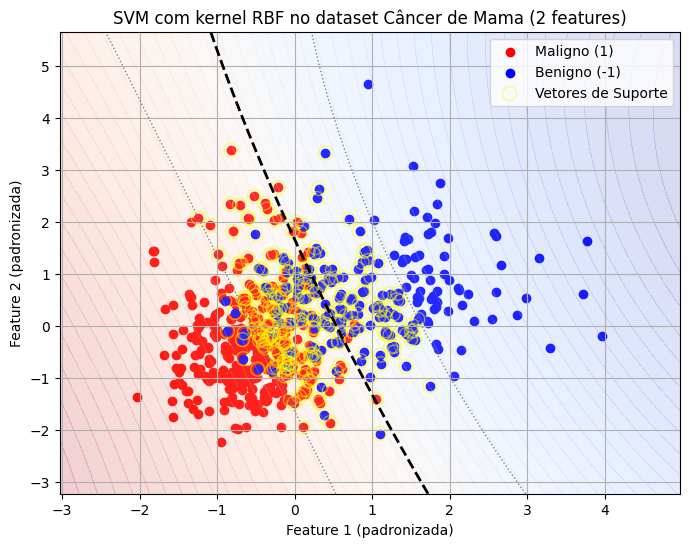

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Carregar o dataset câncer de mama
data = load_breast_cancer()
X = data.data[:, :2]  # Usando apenas as duas primeiras features para visualização
Y = data.target
# Ajustar os rótulos para -1 e 1
Y = np.where(Y == 0, -1, 1)

# Padronizar os dados para melhor desempenho do SVM
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Treinar o SVM com kernel RBF
svm = SVC(kernel='rbf', C=0.695, gamma=0.0069)
svm.fit(X_std, Y)

# Plot dos pontos do dataset câncer de mama
plt.figure(figsize=(8, 6))
plt.scatter(X_std[Y == 1, 0], X_std[Y == 1, 1], color='red', label='Maligno (1)')
plt.scatter(X_std[Y == -1, 0], X_std[Y == -1, 1], color='blue', label='Benigno (-1)')

# Plotando a superfície de inferência (fronteira de decisão)
# Criar um grid de pontos
x_min, x_max = X_std[:, 0].min() - 1, X_std[:, 0].max() + 1
y_min, y_max = X_std[:, 1].min() - 1, X_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar as regiões de decisão e as fronteiras
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap=plt.cm.coolwarm, alpha=0.2)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k', linestyles='--')
plt.contour(xx, yy, Z, levels=[-1, 1], linewidths=1, colors='grey', linestyles=':')

# Vetores de suporte
support_vectors = svm.support_vectors_

# Plot dos vetores de suporte
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
            color='black', edgecolor='yellow', 
            label='Vetores de Suporte', s=100, marker='o', facecolors='none',alpha=0.5)

plt.title('SVM com kernel RBF no dataset Câncer de Mama (2 features)')
plt.xlabel('Feature 1 (padronizada)')
plt.ylabel('Feature 2 (padronizada)')
plt.grid(True)
plt.legend()
plt.show()
